# Load in csv file with compounds and their predicted StarDrop properties

Stardrop properties include:


*   logS
*   logD
*   logP
*   Molecular weight
*   TPSA
*   HBD
*   HBA
*   Rotatable bonds

The class column contains info on whether the specified compound showed activity towards specific parasite stages. Activity towards a specific parasite stage was determined based on fold change values between asexuals and gametocytes IC50 data.

Class classification:


*   ABS preference was defined as >10-fold change (FC) difference in activity between all gametocyte stages and ABS parasites (Gc IC50/ABS IC50).
*   ABS and iGc preference is defined as <10-FC difference in activity between iGc and ABS parasites (iGc IC50/ABS IC50).
*   ABS, LGc and mGc preference is defined as <10-FC difference in activity between LGc and mGc and ABS parasites (LGc IC50/ABS IC50, mGc IC50/ABS IC50).
*   LGc and mGc preference is defined as <1-FC difference in activity between LGc and mGc and ABS parasites (LGc IC50/ABS IC50, mGc IC50/ABS IC50).




   



In [41]:
############################################Sexual data
import pandas as pd
sxl= pd.read_csv("/content/StardropDesc.csv")
sxl=sxl.dropna()
df=sxl
df.head()

,SMILES,logS,logD,logP,MW,TPSA,HBD,HBA,Flexibility,Rotatable Bonds,Class
1,Cc1cc(C)c2CN(Cc3ccccc3Cl)COc2c1,1.6220,3.407,4.263,287.8,12.47,0.0,2.0,0.09091,2.0,ABS
3,Nc1ccc(cc1)c2nc3cc(Cc4ccc5[nH]c(nc5c4)c6ccc(N)...,0.4949,3.498,4.065,430.5,109.40,4.0,6.0,0.10530,4.0,ABS
5,FC(F)(F)Oc1cccc(c1)c1nc2c(nccc2[NH]1)N1CCC(N)CC1,2.0610,2.407,2.246,377.4,80.06,2.0,6.0,0.13330,4.0,ABS
7,FC(F)(F)c1ccc(nc1)N1CCN(CC1)S(=O)(=O)NC1OC2OC3...,0.4456,2.992,3.397,576.6,102.50,1.0,10.0,0.11360,5.0,ABS
9,CO[C@H]1O[C@@H]2O[C@@]3(C)CC[C@H]4[C@H](C)CC[C...,2.0630,2.935,2.935,298.4,46.15,0.0,5.0,0.04167,1.0,ABS


Convert class labels into numbers for ML

In [2]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
sxl['Target']= le.fit_transform(sxl['Class'])

sxl['Target'].unique()

array([0, 1, 3, 2])

Remove any compounds with missing info

In [3]:
############################################Sexual data
import pandas as pd

df["Target"]= sxl["Target"]
df=df.dropna()
df=df.reset_index(drop=True)
df

,SMILES,logS,logD,logP,MW,TPSA,HBD,HBA,Flexibility,Rotatable Bonds,Class,Target
0,Cc1cc(C)c2CN(Cc3ccccc3Cl)COc2c1,1.6220,3.407,4.263,287.8,12.47,0.0,2.00,0.09091,2.0,ABS,0
1,Nc1ccc(cc1)c2nc3cc(Cc4ccc5[nH]c(nc5c4)c6ccc(N)...,0.4949,3.498,4.065,430.5,109.40,4.0,6.00,0.10530,4.0,ABS,0
2,FC(F)(F)Oc1cccc(c1)c1nc2c(nccc2[NH]1)N1CCC(N)CC1,2.0610,2.407,2.246,377.4,80.06,2.0,6.00,0.13330,4.0,ABS,0
3,FC(F)(F)c1ccc(nc1)N1CCN(CC1)S(=O)(=O)NC1OC2OC3...,0.4456,2.992,3.397,576.6,102.50,1.0,10.00,0.11360,5.0,ABS,0
4,CO[C@H]1O[C@@H]2O[C@@]3(C)CC[C@H]4[C@H](C)CC[C...,2.0630,2.935,2.935,298.4,46.15,0.0,5.00,0.04167,1.0,ABS,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2325,CCOC(=O)C1=C(NC(C)=O)SC2=C(O)C(CNC3CCCCC3)=CC=C12,1.3290,1.472,4.176,390.5,3.00,6.0,87.66,0.27590,8.0,ABS_iGc_mGc,2
2326,C[C@@H](NC[C@@H](O)[C@H](Cc1ccccc1)NC(=O)c2ccc...,2.8060,1.704,2.811,514.7,3.00,7.0,84.91,0.29270,12.0,ABS_iGc_mGc,2
2327,CCCC[n+]1c2ccccc2sc1C=C3C=Cc4ccccc4N3CC,0.6185,2.662,5.562,361.5,0.00,2.0,7.12,0.17240,5.0,ABS_iGc_mGc,2
2328,CN1C=C(C(C)=N1)C1=NS(=O)(=O)N(C)C(=C1)C(=O)NC1...,1.6450,1.900,1.900,438.3,1.00,8.0,96.66,0.14290,4.0,ABS_iGc_mGc,2


In [4]:
target= pd.DataFrame()
target["Stage"]=df["Target"]
del df["Target"]

Delete the class and SMILES column so that df only contains the StarDrop properties for model training and testing

In [5]:
del df["Class"]

In [6]:
del df["SMILES"]

In [7]:
df

,logS,logD,logP,MW,TPSA,HBD,HBA,Flexibility,Rotatable Bonds
0,1.6220,3.407,4.263,287.8,12.47,0.0,2.00,0.09091,2.0
1,0.4949,3.498,4.065,430.5,109.40,4.0,6.00,0.10530,4.0
2,2.0610,2.407,2.246,377.4,80.06,2.0,6.00,0.13330,4.0
3,0.4456,2.992,3.397,576.6,102.50,1.0,10.00,0.11360,5.0
4,2.0630,2.935,2.935,298.4,46.15,0.0,5.00,0.04167,1.0
...,...,...,...,...,...,...,...,...,...
2325,1.3290,1.472,4.176,390.5,3.00,6.0,87.66,0.27590,8.0
2326,2.8060,1.704,2.811,514.7,3.00,7.0,84.91,0.29270,12.0
2327,0.6185,2.662,5.562,361.5,0.00,2.0,7.12,0.17240,5.0
2328,1.6450,1.900,1.900,438.3,1.00,8.0,96.66,0.14290,4.0


In [8]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, target["Stage"],test_size=0.2, random_state=42)

Build the model and evaluate performance on the test set

In [9]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(Xt_train, Yt_train)
gnb_predictions = gnb.predict(Xt_test)
y_prob = gnb.predict_proba(Xt_test)

In [10]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(Xt_train, Yt_train)
gnb_predictions = gnb.predict(Xt_test)

from sklearn.metrics import roc_auc_score
# Predict the probabilities for the test set
y_prob = gnb.predict_proba(Xt_test)
# Compute the Multiclass ROC AUC score
score = roc_auc_score(Yt_test, y_prob, multi_class='ovr')

print(f"Multiclass ROC AUC score: {score:.4f}")
# model accuracy for X_test
accuracy = gnb.score(Xt_test, Yt_test)
print(f"Multiclass Accuracy score: {accuracy:.4f}")
from sklearn.metrics import precision_score, recall_score, f1_score
precision_macro = precision_score(Yt_test, gnb_predictions, average='macro')
recall_macro = recall_score(Yt_test, gnb_predictions, average='macro')
f1_macro = f1_score(Yt_test, gnb_predictions, average='macro')

precision_micro = precision_score(Yt_test, gnb_predictions, average='micro')
recall_micro = recall_score(Yt_test, gnb_predictions, average='micro')
f1_micro = f1_score(Yt_test, gnb_predictions, average='micro')

print('Macro-averaged precision:', precision_macro)
print('Macro-averaged recall:', recall_macro)
print('Macro-averaged F1-score:', f1_macro)

print('Micro-averaged precision:', precision_micro)
print('Micro-averaged recall:', recall_micro)
print('Micro-averaged F1-score:', f1_micro)


# creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Yt_test, gnb_predictions)
cm

Multiclass ROC AUC score: 0.8116
Multiclass Accuracy score: 0.6481
Macro-averaged precision: 0.5796017075086843
Macro-averaged recall: 0.5603273065075242
Macro-averaged F1-score: 0.5442518541541628
Micro-averaged precision: 0.648068669527897
Micro-averaged recall: 0.648068669527897
Micro-averaged F1-score: 0.648068669527897


array([[106,   0,   0,   0],
       [  0,   2,  42,  11],
       [  1,   5, 143,  29],
       [  1,   2,  73,  51]])

For interest and comparison to shap values you can also to detemine which Stardrop properties was the most important for making predictions (however, this does not help in distinguishing whether that property is important for eg. ABS activity or Immature gametocyte activity- for this we will use shapley)

In [11]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(gnb, Xt_test, Yt_test, n_repeats=10, random_state=1066)
feat= pd.DataFrame()
feat["importances_mean"]=perm_importance.importances_mean
feat['importances_std']=perm_importance.importances_std
feat

,importances_mean,importances_std
0,0.003648,0.005348
1,0.015451,0.006054
2,0.006867,0.006205
3,0.002575,0.009195
4,0.136910,0.013667
5,-0.002146,0.005078
6,0.039270,0.007740
7,0.010086,0.008314
8,0.007940,0.004706


In [ ]:
feat.to_csv("molsdescFeatimpGNBStardrop.csv", index=False)

Now use shap values to determine which properties aided in the prediction of stage-specific activity

-------------------------------------------

In [13]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.0 MB/s eta 0:00:00


In [ ]:
import shap
# compute SHAP values
explainer = shap.KernelExplainer(gnb.predict_proba, Xt_train)
shap_values = explainer.shap_values(Xt_train)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


  0%|          | 0/1864 [00:00<?, ?it/s]

In [ ]:
from matplotlib import colors as plt_colors
colors=['black', '#aec0d2', '#5780a8',"#00407f"]
# get class ordering from shap values
class_inds = np.argsort([-np.abs(shap_values[i]).mean() for i in range(len(shap_values))])

# create listed colormap
cmap = plt_colors.ListedColormap(np.array(colors)[class_inds])

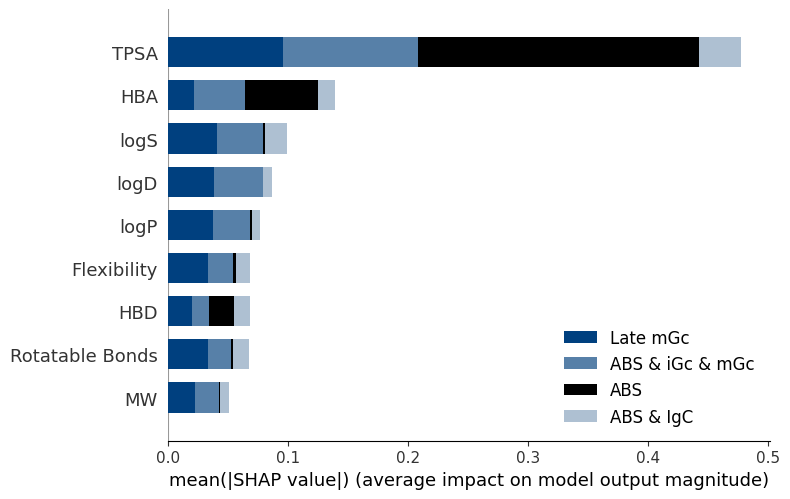

In [ ]:

shap.summary_plot(shap_values, Xt_train.values, plot_type="bar", class_names= ["ABS","ABS & IgC", 'ABS & iGc & mGc','Late mGc'], feature_names = Xt_train.columns, color=cmap, show=False)
plt.savefig('Barr.png',dpi=300,bbox_inches='tight')
plt.show()

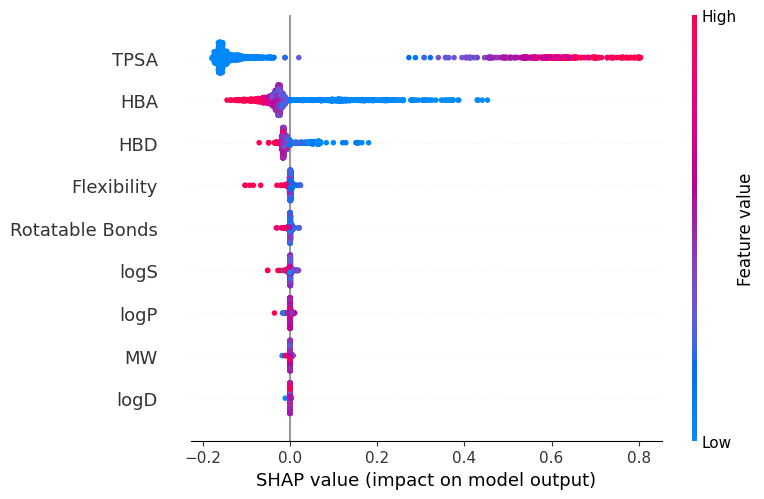

In [ ]:
shap.summary_plot(shap_values[0], Xt_train.values, feature_names = Xt_train.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


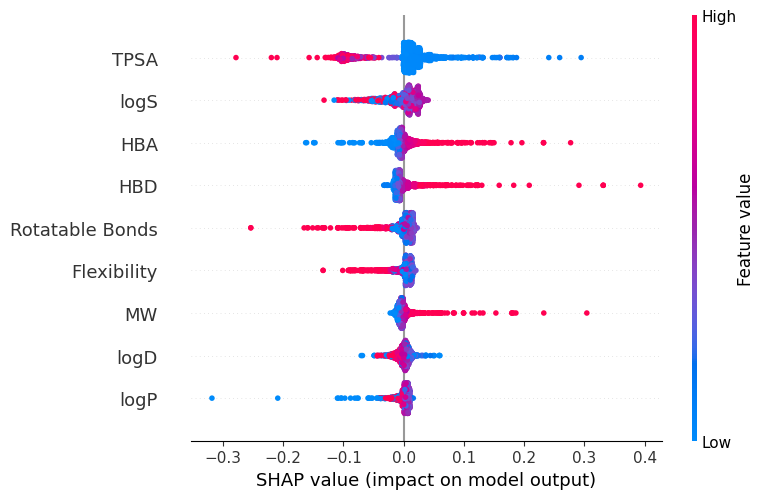

In [ ]:
shap.summary_plot(shap_values[1], Xt_train.values, feature_names = Xt_train.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


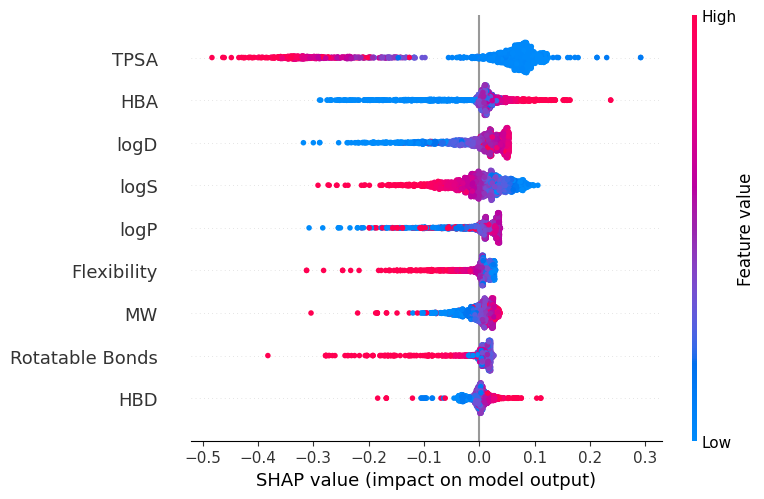

In [ ]:
shap.summary_plot(shap_values[2], Xt_train.values, feature_names = Xt_train.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


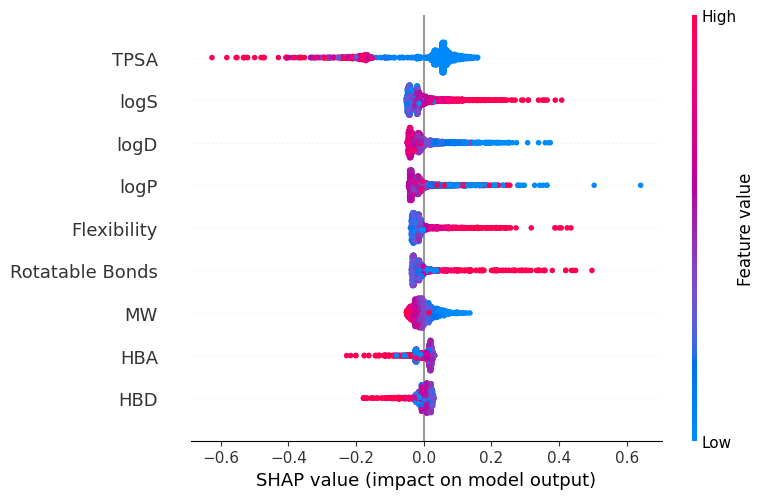

In [ ]:
shap.summary_plot(shap_values[3], Xt_train.values, feature_names = Xt_train.columns)

Use ROC- curves to determine how robust the model is in predicting stage-specific activity for certain stages. (This may give an indication of any bias or consideration to be taken with certain stage-specific class predictions)

<ipython-input-20-25ac03f29aa7>:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


Class 0: ABS
Class 1:ABS_IgC
Class 2: ABS_iGc_mGc
Class 3: Late_mGC


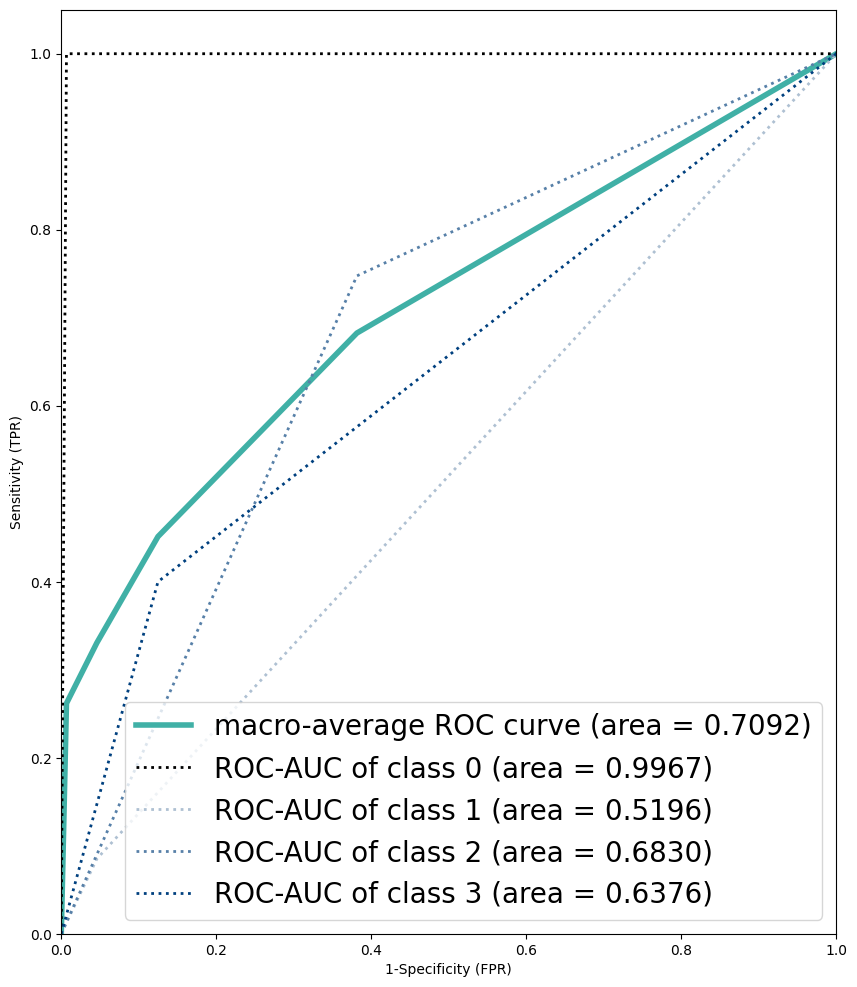

In [20]:
from sklearn.naive_bayes import GaussianNB
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
# shuffle and split training and test sets
x, x_test, y, y_test =\
    train_test_split(df, target["Stage"], test_size=0.33, random_state=42)
n_classes = 4

model=GaussianNB()
model.fit(x,y)
nb=model.score(x,y)

pred1=model.predict(x_test)
t1=sum(x==0 for x in pred1-y_test)/len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
plt.figure(figsize = (10, 12))

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.4f})'
               ''.format(roc_auc["macro"]),
         color='#40B0A6', linewidth=4)

colors = cycle(['black', '#aec0d2', '#5780a8',"#00407f"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC-AUC of class {0} (area = {1:0.4f})'
             ''.format(i, roc_auc[i]), linestyle=':')



print('Class 0: ABS')
print('Class 1:ABS_IgC')
print('Class 2: ABS_iGc_mGc')
print('Class 3: Late_mGC')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'font.family':'sans-serif'})
#plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('1-Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
#plt.title('ROC curve for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

Rename the classes to their specific stage-specific activity

<ipython-input-21-000a74cc492a>:39: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])
<ipython-input-21-000a74cc492a>:51: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(fpr["macro"], tpr["macro"],


Class 0: ABS
Class 1:ABS_IgC
Class 2: ABS_iGc_mGc
Class 3: Late_mGC


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

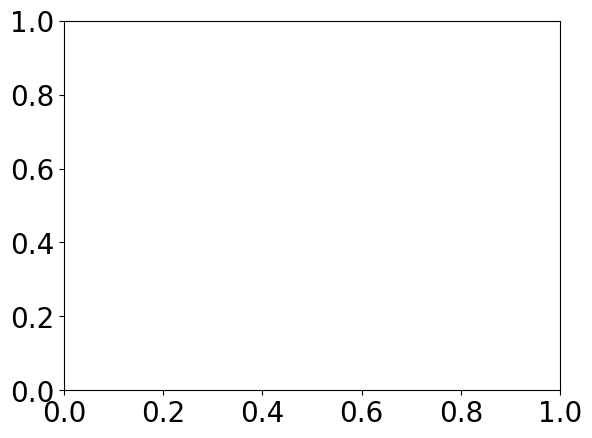

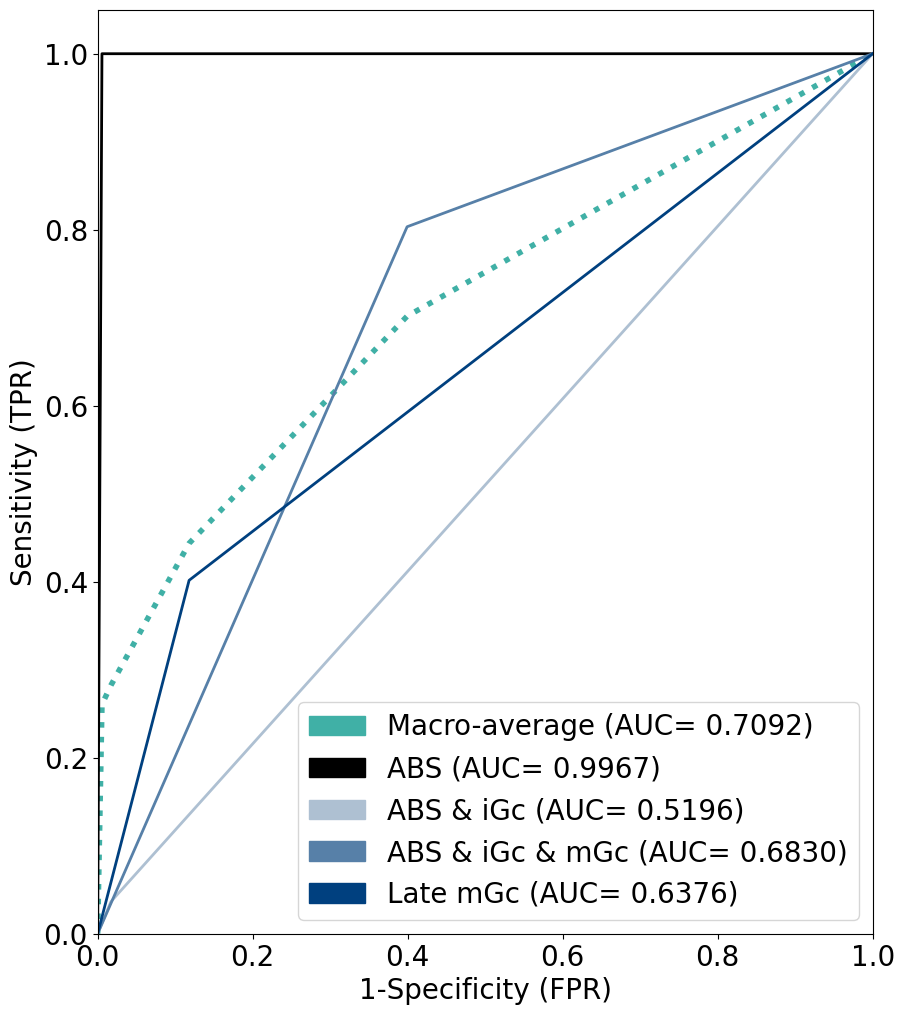

In [21]:
from sklearn.naive_bayes import GaussianNB
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
# shuffle and split training and test sets
x, x_test, y, y_test =\
    train_test_split(df, target["Stage"], test_size=0.2, random_state=42)
n_classes = 4

model=GaussianNB()
model.fit(x,y)
nb=model.score(x,y)

pred1=model.predict(x_test)
t1=sum(x==0 for x in pred1-y_test)/len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw=2
fig, ax = plt.subplots()
plt.figure(figsize = (10, 12))

plt.plot(fpr["macro"], tpr["macro"],
         #label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='#40B0A6', linewidth=4, linestyle=':')

colors = cycle(['black', '#aec0d2', '#5780a8',"#00407f"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw)#,
             #label='ROC-AUC of class {0} (area = {1:0.2f})'
             #''.format(i, roc_auc[i]), linestyle=':')



print('Class 0: ABS')
print('Class 1:ABS_IgC')
print('Class 2: ABS_iGc_mGc')
print('Class 3: Late_mGC')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
#plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
#plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('1-Specificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
#plt.title('ROC curve for Naive Bayes')
from matplotlib.lines import Line2D

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
#col= ['#40B0A6','black', '#aec0d2', '#5780a8',"#00407f"]

av = mpatches.Patch(color='#40B0A6', label='Macro-average (AUC= 0.7092)')
abs = mpatches.Patch(color='black', label='ABS (AUC= 0.9967)')
abig = mpatches.Patch(color='#aec0d2', label='ABS & iGc (AUC= 0.5196)')
abigmg = mpatches.Patch(color='#5780a8', label='ABS & iGc & mGc (AUC= 0.6830)')
mg= mpatches.Patch(color="#00407f", label='Late mGc (AUC= 0.6376)')



plt.legend(handles=[av,abs,abig,abigmg,mg],loc="lower right")

#plt.legend(loc="lower right")
plt.savefig('samplefigure.png')
files.download('samplefigure.png')
plt.show()

